In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ls /home/kyohei/bike_share_data/

201402_babs_open_data/   201508_weather_data.csv  README.txt
201408_babs_open_data/   201608_station_data.csv  babs_open_data_year_1.zip
201508_station_data.csv  201608_status_data.csv   babs_open_data_year_2.zip
201508_status_data.csv   201608_trip_data.csv     babs_open_data_year_3.zip
201508_trip_data.csv     201608_weather_data.csv  readme2.txt


In [3]:
data_status = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_status_data.csv')
data_station = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_station_data.csv')
data_trip = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_trip_data.csv')
data_weather = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_weather_data.csv')

# 基本情報の整理

### stationの情報
- ステーションの名前、ステーションの緯度経度、ステーションのドック数、所在市、サービス開始日

In [127]:
data_station.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-05
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,2013-08-05
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,2013-08-07


In [120]:
#dockcountの分布
data_station.dockcount.value_counts().sort_index()

11     4
15    33
19    18
23     9
25     1
27     4
Name: dockcount, dtype: int64

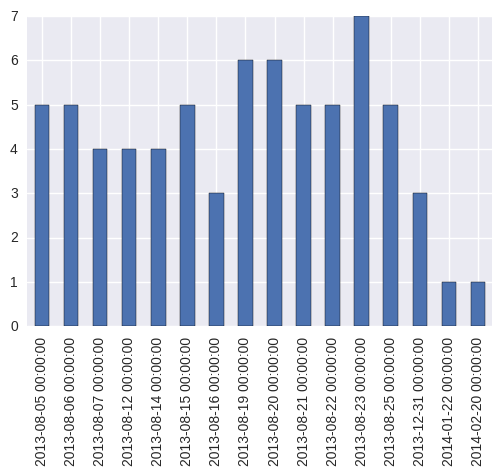

In [126]:
#サービス開始日
data_station['installation'] = pd.to_datetime(data_station.installation)
data_station.installation.value_counts().sort_index().plot(kind='bar')

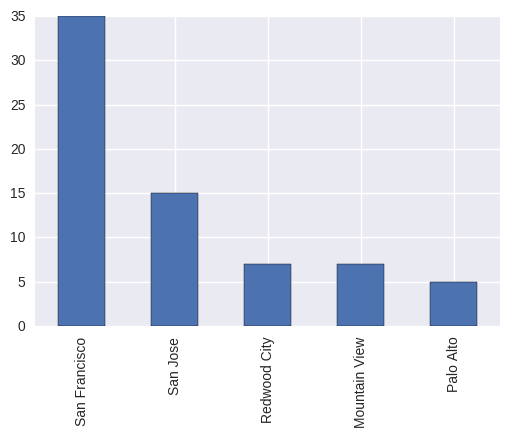

In [125]:
#市毎の設置台数
data_station.landmark.value_counts().plot(kind='bar')

- ドックの数は約半数が15で、maxが27、minが11
- サービス開始日はほとんどが8月だが、年末年始も少しある。
- san franciscoの設置数が35で最大、san joseが15、残りの3津は5〜7個

# 天気情報
- 稼働率と確実に関係がある。

In [128]:
data_weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,zip
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28.0,0,4,NaN,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35.0,0,2,NaN,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31.0,0,4,NaN,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29.0,0,4,NaN,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30.0,0,6,NaN,277,94107


In [130]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 24 columns):
Date                           920 non-null datetime64[ns]
Max_Temperature_F              920 non-null int64
Mean_Temperature_F             920 non-null int64
Min_TemperatureF               920 non-null int64
Max_Dew_Point_F                920 non-null int64
MeanDew_Point_F                920 non-null int64
Min_Dewpoint_F                 920 non-null int64
Max_Humidity                   920 non-null int64
Mean_Humidity                  920 non-null int64
Min_Humidity                   920 non-null int64
Max_Sea_Level_Pressure_In      920 non-null float64
Mean_Sea_Level_Pressure_In     920 non-null float64
Min_Sea_Level_Pressure_In      920 non-null float64
Max_Visibility_Miles           920 non-null int64
Mean_Visibility_Miles          920 non-null int64
Min_Visibility_Miles           920 non-null int64
Max_Wind_Speed_MPH             920 non-null int64
Mean_Wind_Speed_MPH           

In [129]:
data_weather['Date'] = pd.to_datetime(data_weather.Date)

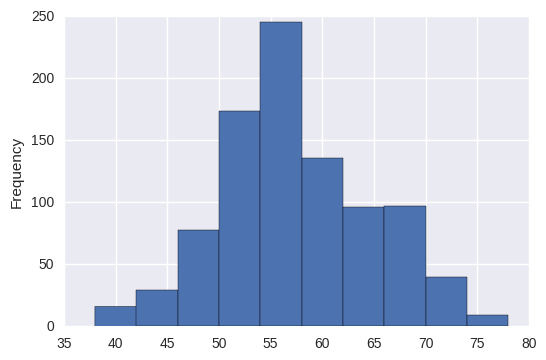

In [135]:
data_weather.Mean_Temperature_F.plot(kind='hist')

In [136]:
data_weather.Mean_Temperature_F.describe()

count    920.000000
mean      56.920652
std        7.306533
min       38.000000
25%       52.000000
50%       56.000000
75%       62.000000
max       78.000000
Name: Mean_Temperature_F, dtype: float64

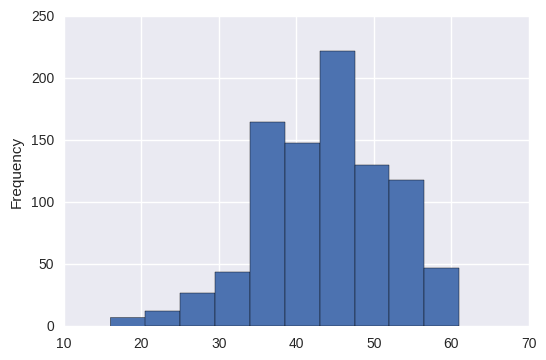

In [137]:
data_weather.MeanDew_Point_F.plot(kind='hist')

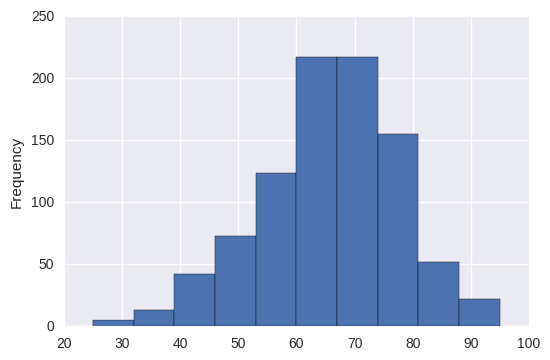

In [147]:
data_weather['Mean_Humidity '].plot(kind='hist')

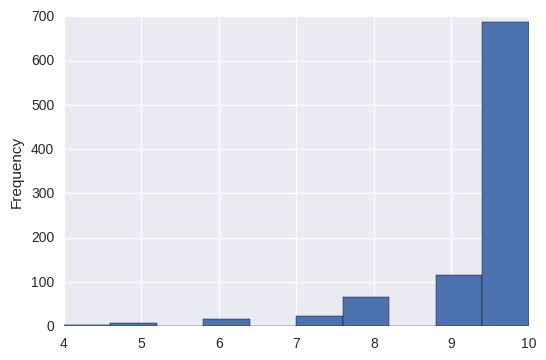

In [150]:
data_weather['Mean_Visibility_Miles '].plot(kind='hist')

In [5]:
data_status_2 = data_status[data_status['station_id']==2]

In [6]:
data_status_2['time'] = pd.to_datetime(data_status_2['time'])

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
data_status_2_20130901_20130930 = data_status_2[(data_status_2.time >= '2013-09-01') & (data_status_2.time < '2013-09-15')]

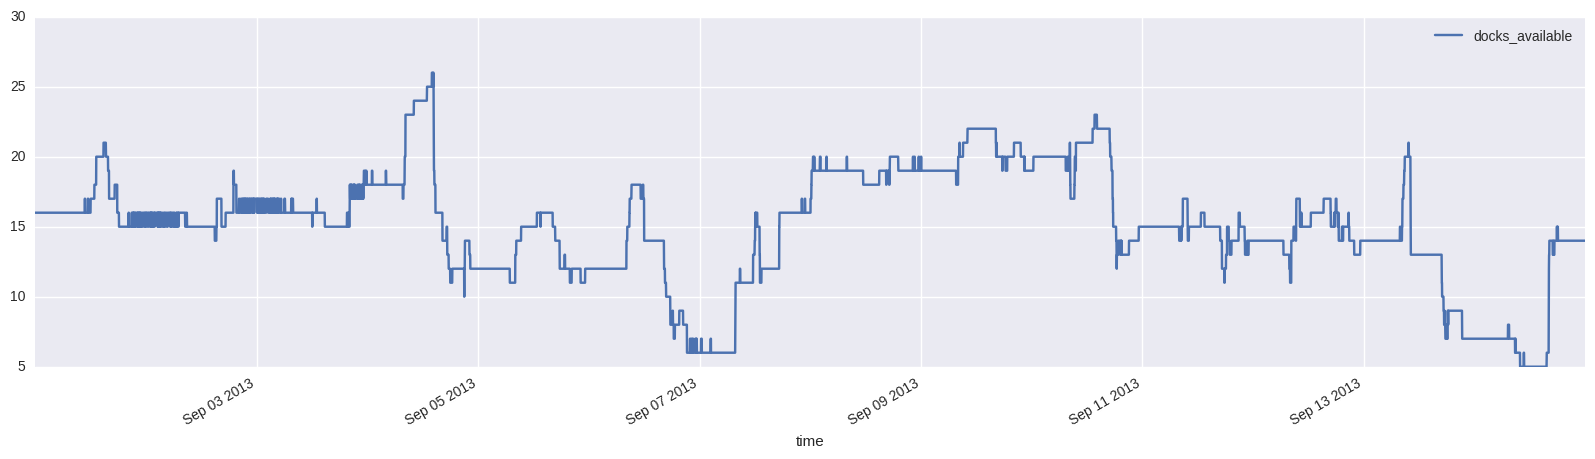

In [8]:
#2013-9-1から2013-9-15のドックの稼働状況の推移図
data_status_2_20130901_20130930.plot('time','docks_available',figsize=(20,5))

In [9]:
data_status_2['interval'] = data_status_2.time - data_status_2.shift(1).time

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
data_status_2['day_of_week'] = data_status_2.apply(lambda x: x['time'].dayofweek,axis=1)#monday=0,sunday=6

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
#bikes_availavleとdocks_availbleの組み合わせは？
data_status_2[data_status_2['bikes_available']==13]['docks_available'].unique()

array([14, 13])

In [12]:
#bikes_availavleとdocks_availbleの組み合わせは？
#基本的にはbikes_availableとdocks_availableを足したら27だが、おそらく準備中、または、充電中の自転車があれば、合計は27未満の場合もある。
pd.DataFrame(data_status_2.groupby(['bikes_available','docks_available']).size())

0
bikes_available docks_available       
0               27                  74
1               26                 305
2               24                 111
                25                 754
3               23                   1
                24                1879
4               22                   7
                23                1415
5               21                  11
                22                2337
6               17                   1
                18                   1
                20                 315
                21                4019
7               19                 772
                20                4807
8               18                 554
                19               11148
9               16                   3
                17                1059
                18               12383
10              16                 905
                17               12806
11              15                1095
                16               21821
12              14                 737
                15               26857
13              13                 255
                14               28621
14              12                 151
                13               30330
15              11                 108
                12               26211
16              10                   3
                11               23066
17              9                   22
                10               17539
18              8                    5
                9                 9586
19              8                 8942
20              7                 4882
21              6                 3174
22              5                 1249
23              4                  166
24              3                    4

In [21]:
#回数ベースの稼働率の計算

#観測回数
observation_num = data_status_2.shape[0]

#docksがフルの回数
docks_no_available = (data_status_2.docks_available==0).sum()

#利用可能自転車がゼロ
bikes_no_available = (data_status_2.bikes_available==0).sum()

print('docksの稼働率:{}'.format((observation_num-docks_no_available) / float(observation_num)))
print('bikesの稼働率:{}'.format((observation_num-bikes_no_available) / float(observation_num)))

docksの稼働率:1.0
bikesの稼働率:0.999715921087


- docksには常に空きがあった
- bikesはまれにゼロになる時があった。→何か法則性があるのか,時期、曜日、時間帯

In [23]:
#月
data_status_2[data_status_2.bikes_available==0]

,station_id,bikes_available,docks_available,time,interval,day_of_week
91002,2,0,27,2013-11-03 02:00:01,00:01:00,6
91003,2,0,27,2013-11-03 02:01:01,00:01:00,6
91004,2,0,27,2013-11-03 02:02:01,00:01:00,6
91005,2,0,27,2013-11-03 02:03:01,00:01:00,6
136103,2,0,27,2013-12-04 10:02:03,00:01:01,2
136104,2,0,27,2013-12-04 10:03:02,00:00:59,2
136105,2,0,27,2013-12-04 10:04:02,00:01:00,2
136106,2,0,27,2013-12-04 10:05:02,00:01:00,2
136107,2,0,27,2013-12-04 10:06:03,00:01:01,2
136108,2,0,27,2013-12-04 10:07:03,00:01:00,2


In [24]:
who

bikes_no_available	 data_station	 data_status	 data_status_2	 data_status_2_20130901_20130930	 data_trip	 data_weather	 docks_no_available	 np	 
observation_num	 pd	 plt	 sns	 


In [75]:
#station毎の稼働率
station_id = data_station['station_id']
operation_rate_bikes_numbers = []
operation_rate_docks_numbers = []
operation_rate_bikes_times = []
operation_rate_docks_times = []
for i in station_id:
    status = data_status[data_status.station_id==i]
    #datetimeに変換
    #status.time = pd.to_datetime(status.time)
    #status_sep = status[(status.time >= '2013-09-01') & (status.time < '2013-10-01')]
    #観測間の時間
    #status_sep['interval'] = status_sep.time - status_sep.time.shift(1)
    #曜日の追加
    #status['day_of_week'] = status.apply(lambda x: x['time'].dayofweek,axis=1)
    #稼働率の計算、観測回数ベース
    operation_rate_bikes_number = (status.bikes_available==0).sum() / float(status.shape[0])
    operation_rate_docks_number = (status.docks_available==0).sum() / float(status.shape[0])
    operation_rate_bikes_numbers.append(operation_rate_bikes_number)
    operation_rate_docks_numbers.append(operation_rate_docks_number)

In [81]:
station_id.iloc[np.argmax(operation_rate_bikes_numbers)]

73

In [83]:
status_73 = data_status[data_status.station_id==73]

In [86]:
status_73['time'] = pd.to_datetime(status_73.time)
status_73['dayofweek'] = status_73.apply(lambda x:x['time'].dayofweek,axis=1)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [87]:
status_73['month'] = status_73.apply(lambda x:x['time'].month,axis=1)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [92]:
status_73['no_available_bike'] = (status_73.bikes_available==0)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
#月ごとの稼働率(0台観測回数)
status_73.groupby('month')['no_available_bike'].sum() / status_73.groupby('month')['no_available_bike'].size()

month
1     0.021729
2     0.017089
8     0.000000
9     0.023161
10    0.022183
11    0.039051
12    0.024288
dtype: float64

In [100]:
#曜日別の稼働率(0台観測回数)
status_73.groupby('dayofweek')['no_available_bike'].sum() / status_73.groupby('dayofweek')['no_available_bike'].size()

dayofweek
0    0.034310
1    0.034928
2    0.027654
3    0.036659
4    0.029500
5    0.004866
6    0.001926
dtype: float64

In [101]:
status_73

,station_id,bikes_available,docks_available,time,dayofweek,month,no_available_bike
15540166,73,4,11,2013-08-29 12:06:01,3,8,False
15540167,73,4,11,2013-08-29 12:07:01,3,8,False
15540168,73,4,11,2013-08-29 12:08:01,3,8,False
15540169,73,4,11,2013-08-29 12:09:01,3,8,False
15540170,73,4,11,2013-08-29 12:10:01,3,8,False
15540171,73,4,11,2013-08-29 12:11:01,3,8,False
15540172,73,4,11,2013-08-29 12:12:01,3,8,False
15540173,73,4,11,2013-08-29 12:13:01,3,8,False
15540174,73,3,12,2013-08-29 12:15:01,3,8,False
15540175,73,3,12,2013-08-29 12:16:02,3,8,False


In [104]:
data_station.sort_values('dockcount',ascending=False)

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
55,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
49,61,2nd at Townsend,37.780526,-122.390288,27,San Francisco,8/22/2013
15,22,Redwood City Caltrain Station,37.486078,-122.232089,25,Redwood City,8/15/2013
21,28,Mountain View Caltrain Station,37.394358,-122.076713,23,Mountain View,8/15/2013
22,29,San Antonio Caltrain Station,37.406940,-122.106758,23,Mountain View,8/15/2013
57,69,San Francisco Caltrain 2 (330 Townsend),37.776377,-122.396070,23,San Francisco,8/23/2013
60,72,Civic Center BART (7th at Market),37.780356,-122.412919,23,San Francisco,8/23/2013
27,34,Palo Alto Caltrain Station,37.443988,-122.164759,23,Palo Alto,8/14/2013
